# 时间序列

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dateutil.parser import parse

## Peaks


In [2]:
passengers = pd.read_csv("data/air_passengers.csv")
passengers.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
traffic = passengers.value
doubled_iff = np.diff(np.sign(np.diff(traffic)))
peak_locations = np.where(doubled_iff == -2)[0] + 1

doubled_iff2 = np.diff(np.sign(np.diff(-1 * traffic)))
trough_locations = np.where(doubled_iff2 == -2)[0] + 1

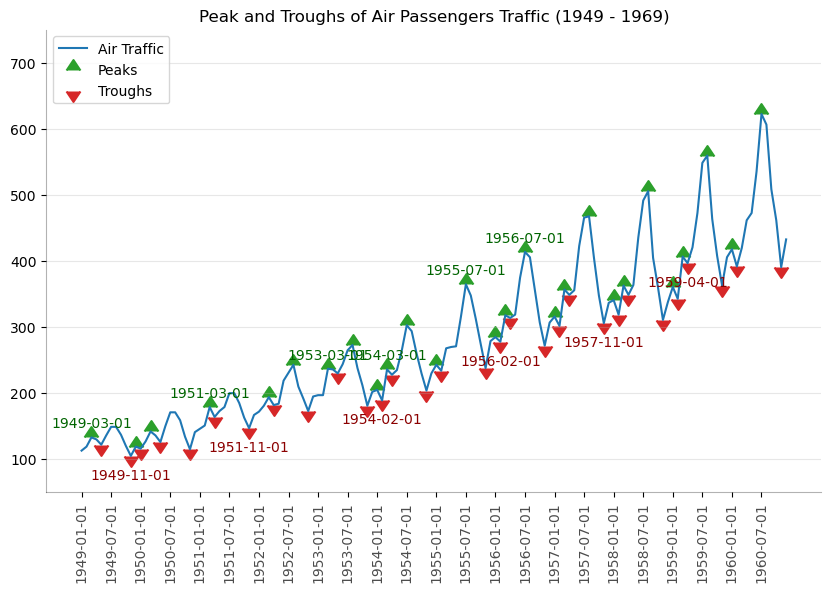

In [4]:
_, ax = plt.subplots(figsize=(10, 6))

ax.plot("date", "value", data=passengers, color="tab:blue", label="Air Traffic")

ax.scatter(
    passengers.date[peak_locations],
    passengers.value[peak_locations],
    marker=mpl.markers.CARETUPBASE,
    color="tab:green",
    s=100,
    label="Peaks",
)

ax.scatter(
    passengers.date[trough_locations],
    passengers.value[trough_locations],
    marker=mpl.markers.CARETDOWNBASE,
    color="tab:red",
    s=100,
    label="Troughs",
)

for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    ax.text(
        passengers.date[p],
        passengers.value[p] + 15,
        passengers.date[p],
        horizontalalignment="center",
        color="darkgreen",
    )

    ax.text(
        passengers.date[t],
        passengers.value[t] - 35,
        passengers.date[t],
        horizontalalignment="center",
        color="darkred",
    )

xtick_location = passengers.index.tolist()[::6]
xtick_labels = passengers.date.tolist()[::6]
ytick_labels = passengers.value.tolist()[::6]

ax.set(ylim=(50, 750))
ax.set_xticks(ticks=xtick_location)
ax.set_xticklabels(labels=xtick_labels, rotation=90, alpha=0.7)
ax.set(title="Peak and Troughs of Air Passengers Traffic (1949 - 1969)")

ax.spines["top"].set_alpha(0.0)
ax.spines["bottom"].set_alpha(0.3)
ax.spines["right"].set_alpha(0.0)
ax.spines["left"].set_alpha(0.3)

ax.legend(loc="upper left")
ax.grid(axis="y", alpha=0.3)
plt.show()

## Seasonal


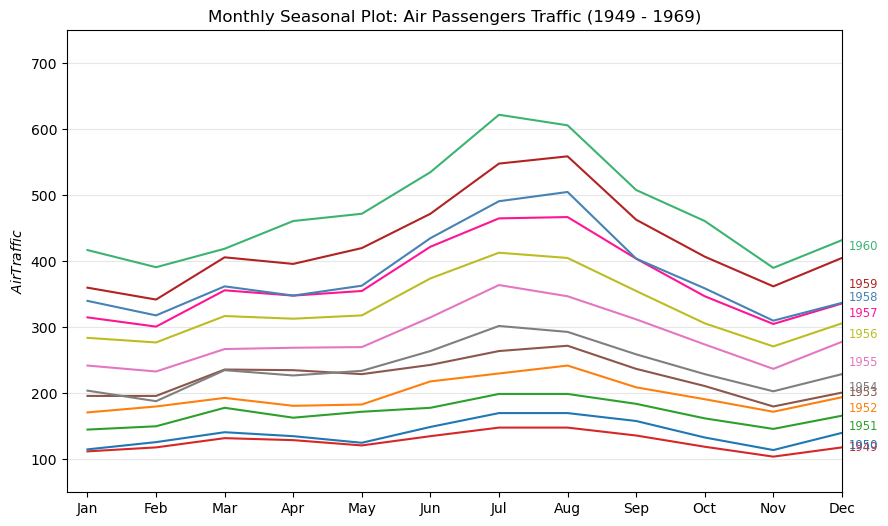

In [5]:
passengers["year"] = [parse(d).year for d in passengers.date]
passengers["month"] = [parse(d).strftime("%b") for d in passengers.date]
years = passengers["year"].unique()

mycolors = [
    "tab:red",
    "tab:blue",
    "tab:green",
    "tab:orange",
    "tab:brown",
    "tab:grey",
    "tab:pink",
    "tab:olive",
    "deeppink",
    "steelblue",
    "firebrick",
    "mediumseagreen",
]

_, ax = plt.subplots(figsize=(10, 6))

for i, y in enumerate(years):
    ax.plot(
        "month",
        "value",
        data=passengers.query(f"year=={y}"),
        color=mycolors[i],
        label=y,
    )
    ax.text(
        passengers.query(f"year=={y}").shape[0] - 0.9,
        passengers.query(f"year=={y}")["value"].loc[-1:].array[0],
        y,
        fontsize="small",
        color=mycolors[i],
    )

ax.set(
    xlim=(-0.3, 11),
    ylim=(50, 750),
    ylabel="$Air Traffic$",
    title="Monthly Seasonal Plot: Air Passengers Traffic (1949 - 1969)",
)

ax.grid(axis="y", alpha=0.3)
plt.show()

## Cross Correlation


In [6]:
from statsmodels.tsa import stattools

In [7]:
mortality = pd.read_csv("data/mortality.csv")
mortality.head()

,date,mdeaths,fdeaths
0,Jan 1974,2134,901
1,Feb 1974,1863,689
2,Mar 1974,1877,827
3,Apr 1974,1877,677
4,May 1974,1492,522


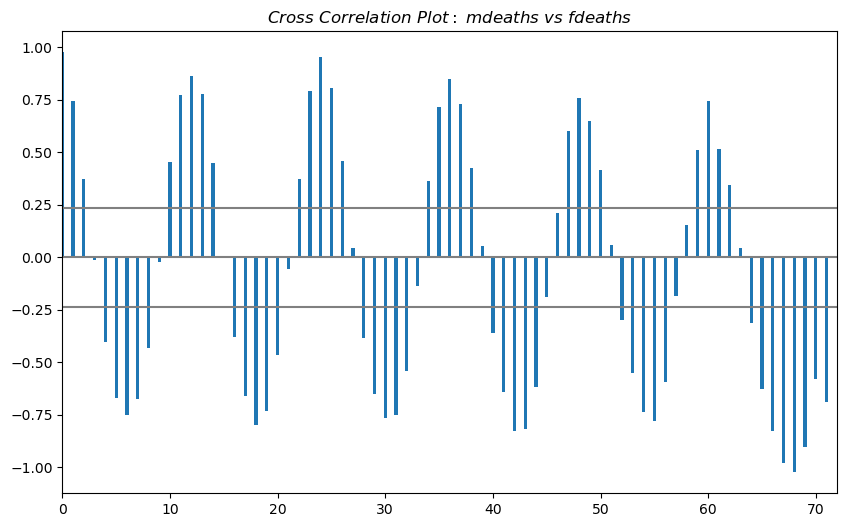

In [8]:
x = mortality["mdeaths"]
y = mortality["fdeaths"]

ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

conf_level = 2 / np.sqrt(nlags)

_, ax = plt.subplots(figsize=(10, 6))

ax.hlines(0, xmin=0, xmax=100, color="gray")
ax.hlines(conf_level, xmin=0, xmax=100, color="gray")
ax.hlines(-conf_level, xmin=0, xmax=100, color="gray")

ax.bar(x=np.arange(len(ccs)), height=ccs, width=0.3)

ax.set(xlim=(0, len(ccs)), title=r"$Cross\ Correlation\ Plot:\ mdeaths\ vs\ fdeaths$")

plt.show()

## Decomposition


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
passengers = pd.read_csv("data/air_passengers.csv")
passengers.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
date = passengers["date"]
dates = pd.DatetimeIndex(data=date)

passengers = passengers.set_index(dates)

result = seasonal_decompose(passengers["value"], model="multiplicative")

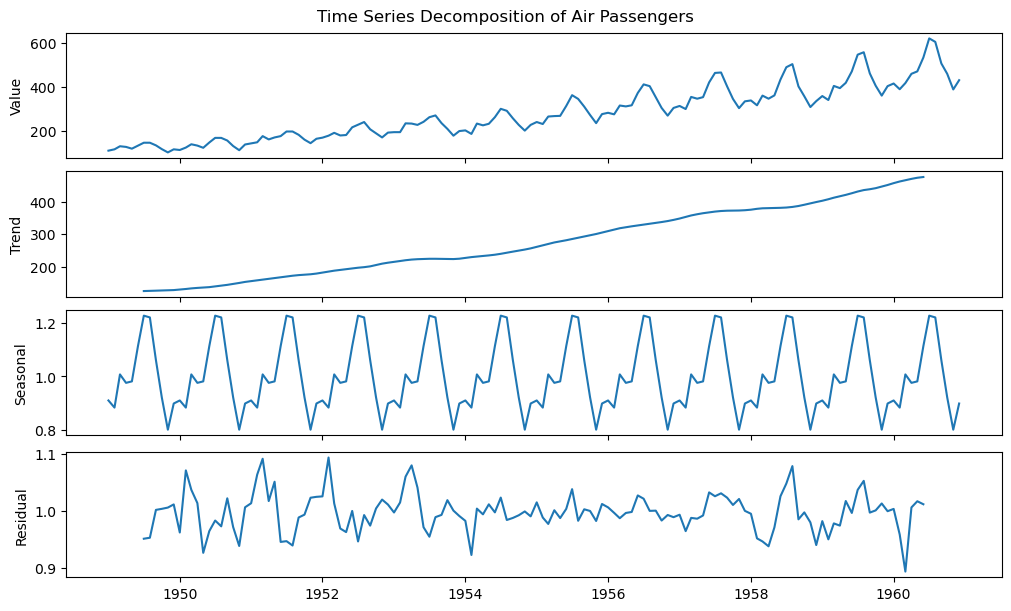

In [12]:
fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True, constrained_layout=True)

ys = (result.observed, result.trend, result.seasonal, result.resid)
ylabels = ("Value", "Trend", "Seasonal", "Residual")

for ax, y, ylabel in zip(axes.flatten(), ys, ylabels):
    ax.plot(dates, y)
    ax.set(ylabel=ylabel)

fig.suptitle("Time Series Decomposition of Air Passengers")

plt.show()

## Double Y


In [13]:
economics = pd.read_csv("data/economics.csv", parse_dates=["date"])
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


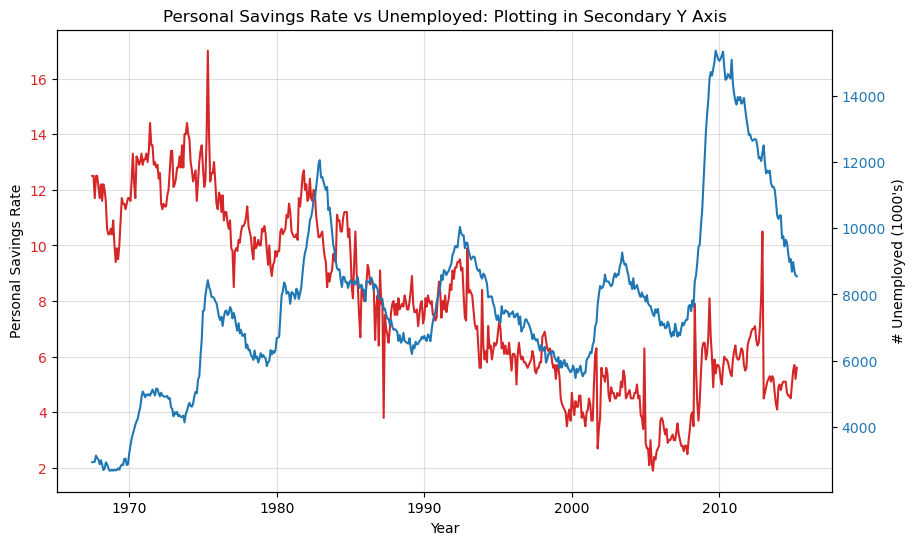

In [14]:
x = economics["date"]
y1 = economics["psavert"]
y2 = economics["unemploy"]

_, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y1, color="tab:red")

# Plot Line2 (Right Y Axis)
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color="tab:blue")

ax.set(xlabel="Year")
ax.tick_params(axis="x", rotation=0)
ax.set(ylabel="Personal Savings Rate")
ax.tick_params(axis="y", rotation=0, labelcolor="tab:red")
ax.grid(alpha=0.4)

ax2.set(ylabel="# Unemployed (1000's)")
ax2.tick_params(axis="y", labelcolor="tab:blue")
ax2.set(title="Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis")

plt.show()

## SEM


In [15]:
from scipy.stats import sem

In [16]:
orders = pd.read_csv("data/user_orders_hourofday.csv")
orders.head()

,user_id,order_hour_of_day,quantity
0,1,7,20
1,1,8,23
2,1,9,12
3,1,12,11
4,1,14,10


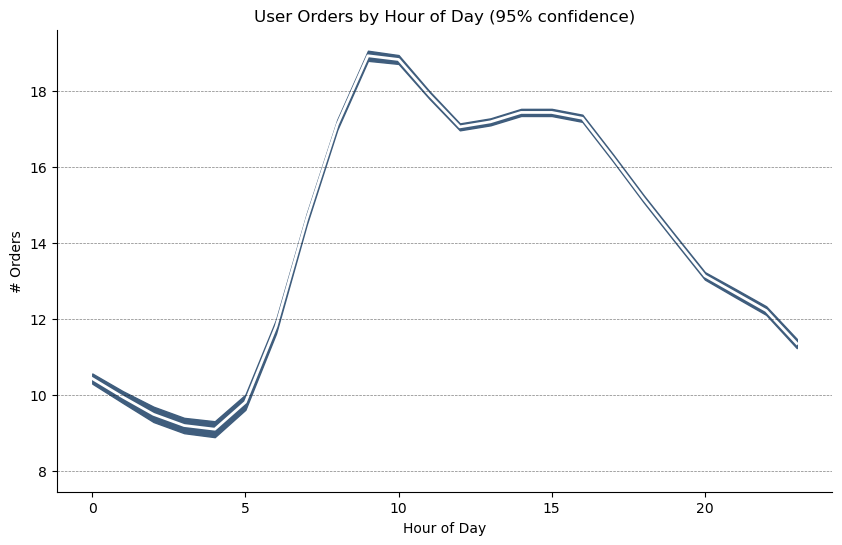

In [17]:
orders_mean = orders.groupby("order_hour_of_day").quantity.mean()
orders_se = orders.groupby("order_hour_of_day").quantity.apply(sem).mul(1.96)

x = orders_mean.index

fig, ax = plt.subplots(figsize=(10, 6))
ax.set(ylabel="# Orders")
ax.plot(x, orders_mean, color="white", lw=2)
ax.fill_between(x, orders_mean - orders_se, orders_mean + orders_se, color="#3F5D7D")

ax.spines["top"].set_alpha(0)
ax.spines["bottom"].set_alpha(1)
ax.spines["right"].set_alpha(0)
ax.spines["left"].set_alpha(1)
ax.set(title="User Orders by Hour of Day (95% confidence)")
ax.set(xlabel="Hour of Day")

s, e = ax.get_xlim()
ax.set(xlim=(s, e))

for y in range(8, 20, 2):
    ax.hlines(y, xmin=s, xmax=e, colors="black", alpha=0.5, linestyles="--", lw=0.5)

plt.show()

In [18]:
from dateutil.parser import parse
from scipy.stats import sem

In [19]:
orders_45d = pd.read_csv(
    "data/orders_45d.csv", parse_dates=["purchase_time", "purchase_date"]
)
orders_45d.head()

,purchase_time,purchase_date,quantity
0,2017-05-16 13:10:30,2017-05-16,5
1,2017-05-16 19:41:10,2017-05-16,3
2,2017-05-19 18:53:40,2017-05-19,2
3,2017-05-18 13:55:47,2017-05-18,1
4,2017-05-14 20:28:25,2017-05-14,3


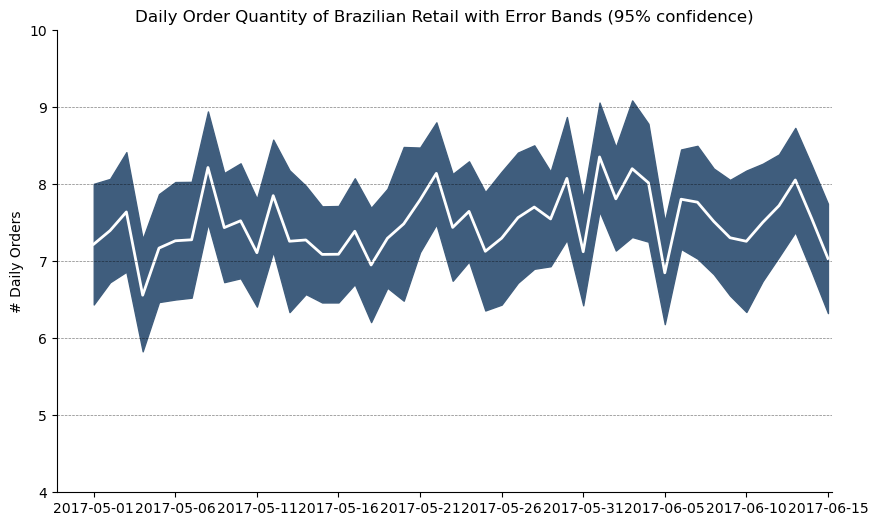

In [20]:
orders_mean = orders_45d.groupby("purchase_date").quantity.mean()
orders_se = orders_45d.groupby("purchase_date").quantity.apply(sem).mul(1.96)

x = [d.date().strftime("%Y-%m-%d") for d in orders_mean.index]

_, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, orders_mean, color="white", lw=2)
ax.fill_between(x, orders_mean - orders_se, orders_mean + orders_se, color="#3F5D7D")

ax.spines["top"].set_alpha(0)
ax.spines["bottom"].set_alpha(1)
ax.spines["right"].set_alpha(0)
ax.spines["left"].set_alpha(1)

ax.set(ylabel="# Daily Orders")
ax.set_xticks(np.arange(0, len(x), 5))
ax.set(
    title="Daily Order Quantity of Brazilian Retail with Error Bands (95% confidence)"
)

s, e = ax.get_xlim()
ax.set(xlim=(s, e - 2), ylim=(4, 10))

for y in range(5, 10):
    ax.hlines(y, xmin=s, xmax=e, colors="black", alpha=0.5, linestyles="--", lw=0.5)

plt.show()

## Area


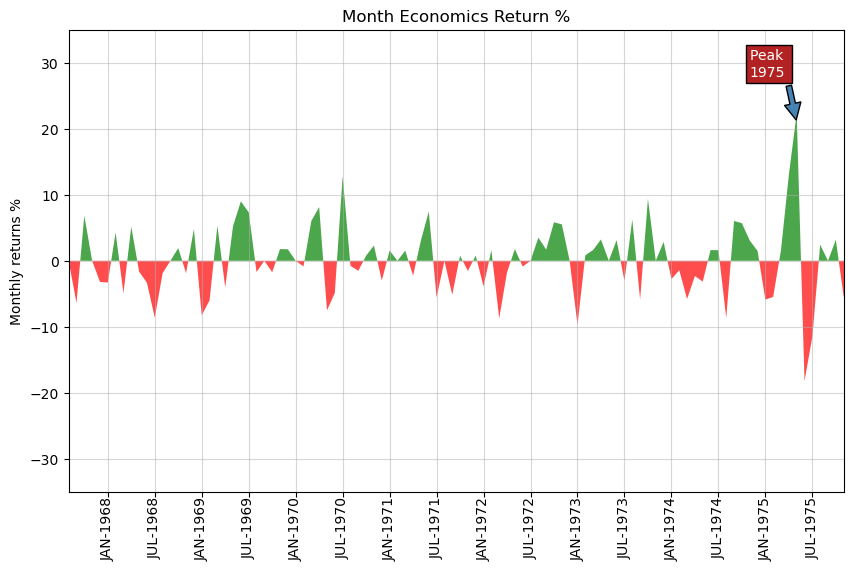

In [21]:
economics = pd.read_csv("data/economics.csv", parse_dates=["date"])

x = np.arange(economics.shape[0])
y_returns = (economics.psavert.diff().fillna(0) / economics.psavert.shift(1)).fillna(
    0
) * 100

_, ax = plt.subplots(figsize=(10, 6))

ax.fill_between(
    x[1:],
    y_returns[1:],
    0,
    where=y_returns[1:] >= 0,
    facecolor="green",
    interpolate=True,
    alpha=0.7,
)

ax.fill_between(
    x[1:],
    y_returns[1:],
    0,
    where=y_returns[1:] <= 0,
    facecolor="red",
    interpolate=True,
    alpha=0.7,
)

ax.annotate(
    "Peak \n1975",
    xy=(94.0, 21.0),
    xytext=(88.0, 28),
    bbox={"boxstyle": "square", "fc": "firebrick"},
    arrowprops={"facecolor": "steelblue", "shrink": 0.05},
    fontsize="medium",
    color="white",
)

xtickvals = [
    f"{str(m)[:3].upper()}-{y!s}"
    for y, m in zip(economics.date.dt.year, economics.date.dt.month_name())
]

ax.set_xticks(x[::6])
ax.set_xticklabels(
    xtickvals[::6],
    rotation=90,
    fontdict={"horizontalalignment": "center", "verticalalignment": "center_baseline"},
)
ax.set(
    xlim=(1, 100),
    ylim=(-35, 35),
    title="Month Economics Return %",
    ylabel="Monthly returns %",
)
ax.grid(alpha=0.5)

plt.show()

## Stacked Area


In [22]:
visitors = pd.read_csv("data/night_visitors.csv", parse_dates=["yearmon"])
visitors.head()

/var/folders/py/n14256yd5r5ddms88x9bvsv40000gn/T/ipykernel_26743/1439259366.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  visitors = pd.read_csv("data/night_visitors.csv", parse_dates=["yearmon"])


,yearmon,Sydney,NSW,Melbourne,VIC,BrisbaneGC,QLD,Capitals,Other
0,1998-01-01,7320,21782,4865,14054,9055,8016,9178,10232
1,1998-04-01,6117,16881,4100,8237,5616,8461,6362,9540
2,1998-07-01,6282,13495,4418,6731,8298,13175,7965,12385
3,1998-10-01,6368,15963,5157,7675,6674,9092,6864,13098
4,1999-01-01,6602,22718,5550,13581,9168,10224,8908,10140


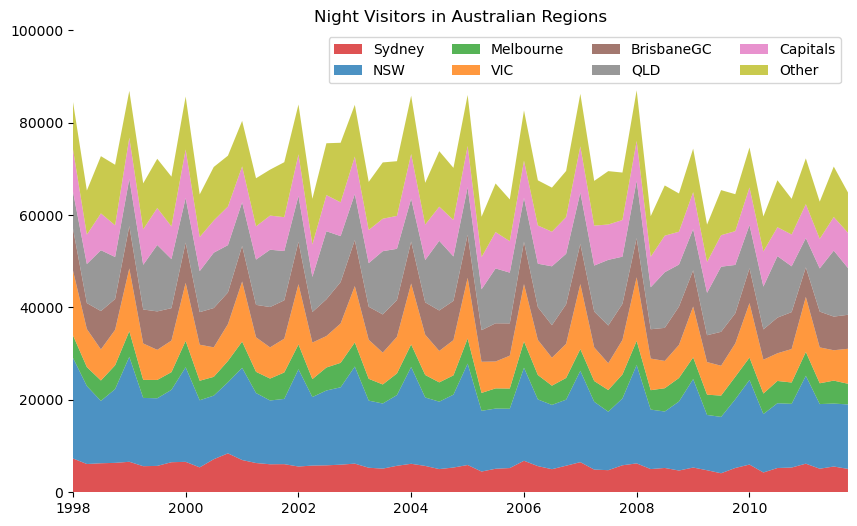

In [23]:
mycolors = [
    "tab:red",
    "tab:blue",
    "tab:green",
    "tab:orange",
    "tab:brown",
    "tab:grey",
    "tab:pink",
    "tab:olive",
]

columns = visitors.columns[1:]
labs = columns.array.tolist()

x = visitors["yearmon"].array.tolist()

ys = []

for i in range(8):
    yi = visitors[columns[i]].array.tolist()
    ys.append(yi)

y = np.vstack(ys)

labs = columns.array.tolist()

_, ax = plt.subplots(figsize=(10, 6))

ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)

ax.set(ylim=[0, 100000], title="Night Visitors in Australian Regions")
ax.set(xlim=(x[0], x[-1]))
ax.spines[["right", "top", "left", "bottom"]].set_visible(False)
ax.legend(ncol=4)
plt.setp(ax.get_xticklabels()[::5], horizontalalignment="center")
plt.setp(ax.get_yticklabels()[::5], horizontalalignment="right")

plt.show()

## Unstacked Area


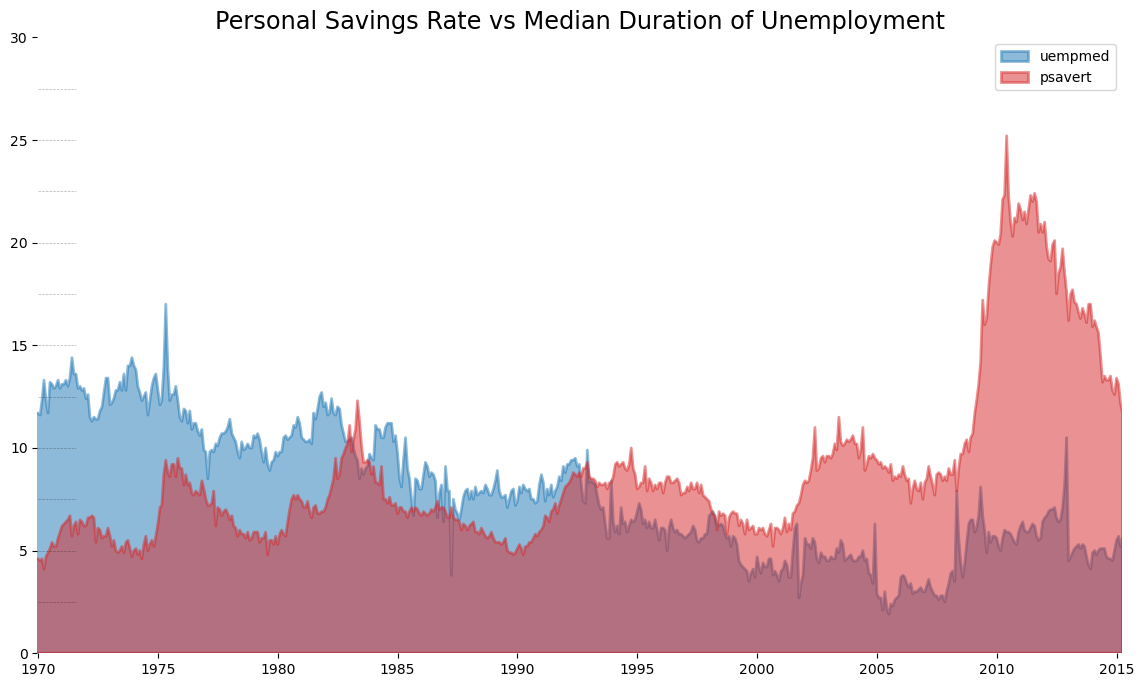

In [24]:
x = economics["date"].array.tolist()
y1 = economics["psavert"].array.tolist()
y2 = economics["uempmed"].array.tolist()
mycolors = [
    "tab:red",
    "tab:blue",
    "tab:green",
    "tab:orange",
    "tab:brown",
    "tab:grey",
    "tab:pink",
    "tab:olive",
]
columns = ["psavert", "uempmed"]

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], lw=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], lw=2)

ax.set(xlim=(-10, x[-1]), ylim=[0, 30])

ax.set_title(
    "Personal Savings Rate vs Median Duration of Unemployment", fontsize="xx-large"
)


ax.legend(loc="best")
plt.setp(ax.get_xticklabels()[::50], horizontalalignment="center")
plt.setp(ax.get_yticklabels()[::50], horizontalalignment="right")

for y in np.arange(2.5, 30.0, 2.5):
    ax.hlines(
        y, xmin=0, xmax=len(x), colors="black", alpha=0.3, linestyles="--", lw=0.5
    )

ax.spines[["right", "top", "left", "bottom"]].set_visible(False)

plt.show()